# Case Studies

## Project: 1
### Week 4

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Preprocessing
### Variable transformation
Evaluate the quadratic nature of the target variable (measured_sysstolic) and transform it to a quadratic form if necessary. If the quadratic nature of the target variable is not significant, then the transformation is not necessary.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from helper_functions import *

In [2]:
# constants

# setting criterion for best subset selection
BEST_SUBSET_CRITERION = "mse"

In [3]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Large preprocessing

In [4]:
# variables that are dropped 
to_filter = ["id", "zeit", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "schaetzwert_bp_sys", "schaetzwert_by_dia", "terminal"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

# one hot encoding cat variables to prep data for Decision Tree
# ordinal variables and nominal are treated the same in trees, but need to be careful in Lin models

encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831 entries, 0 to 14830
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bundesland           14831 non-null  object 
 1   befinden             14831 non-null  object 
 2   geschlecht           14831 non-null  object 
 3   raucher              14831 non-null  object 
 4   blutzucker_bekannt   14831 non-null  object 
 5   cholesterin_bekannt  14831 non-null  object 
 6   in_behandlung        14831 non-null  object 
 7   messwert_bp_sys      14831 non-null  float64
 8   messwert_bp_dia      14831 non-null  float64
 9   month                14831 non-null  int32  
 10  hour                 14831 non-null  int32  
 11  day                  14831 non-null  int32  
 12  age                  14831 non-null  int32  
dtypes: float64(2), int32(4), object(7)
memory usage: 1.2+ MB


In [6]:
# transforming to dummy vars
encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [7]:
print("Size of training data: ", len(encoded_train_set))
print("Size of testing data: ", len(encoded_test_set))
print("Features used: ", data_df.columns)

Size of training data:  10381
Size of testing data:  4450
Features used:  Index(['bundesland', 'befinden', 'geschlecht', 'raucher', 'blutzucker_bekannt',
       'cholesterin_bekannt', 'in_behandlung', 'messwert_bp_sys',
       'messwert_bp_dia', 'month', 'hour', 'day', 'age'],
      dtype='object')


### Models for Diastolic as target

In [8]:
target_dia = "messwert_bp_dia"
X_train_dia, Y_train_dia = separate_target(encoded_train_set, target_dia)
X_test_dia, Y_test_dia = separate_target(encoded_test_set, target_dia)

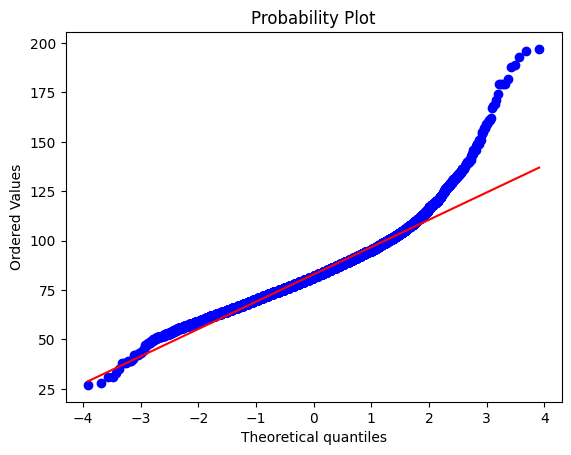

In [9]:
generate_qq_plot(data_df[target_dia])

Base Model

In [10]:
train_results_base_dia, test_results_base_dia, model_base_dia = fit_model(X_train_dia, Y_train_dia, X_test_dia,
                                                                        Y_test_dia, "LinearRegression")
model_base_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     384.7
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        15:59:49   Log-Likelihood:                -39114.
No. Observations:               10381   AIC:                         7.828e+04
Df Residuals:                   10357   BIC:                         7.845e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      29.8686      1.612     18.534      0.000      26.710      33.028
bundesland_Kärnten             -0.5673      1.530     -0.371      0.711      -3.567       2.432
bundesland_Niederösterreich    -1.8177      1.354     -1.342      0.180      -4.473       0.837
bundesland_Oberösterreich      -1.5552      1.498     -1.038      0.299      -4.491       1.381
bundesland_Salzburg            -0.4921      1.807     -0.272      0.785      -4.035       3.050
bundesland_Steiermark          -1.5856      1.201     -1.320      0.187      -3.940       0.769
bundesland_Tirol                0.2210      1.931      0.114      0.909      -3.564       4.006
bundesland_Vorarlberg          -0.2309      2.813     -0.082      0.935      -5.744       5.282
bundesland_Wien                -0.2793      1.327     -0.211      0.833      -2.880       2.321
bundesland_not_applicable      -1.2446      1.427     -0.872      0.383      -4.042       1.553
befinden_2                     -0.8471      0.232     -3.656      0.000      -1.301      -0.393
befinden_3                     -1.0474      0.331     -3.164      0.002      -1.696      -0.399
befinden_4                     -0.4224      0.952     -0.444      0.657      -2.289       1.444
befinden_5                      3.7550      1.633      2.300      0.021       0.554       6.956
geschlecht_m                    0.9563      0.211      4.536      0.000       0.543       1.370
raucher_True                    0.4281      0.287      1.492      0.136      -0.134       0.990
blutzucker_bekannt_True        -0.4575      0.292     -1.569      0.117      -1.029       0.114
cholesterin_bekannt_True        0.3058      0.271      1.128      0.259      -0.225       0.837
in_behandlung_True             -1.5754      0.334     -4.720      0.000      -2.230      -0.921
messwert_bp_sys                 0.5192      0.006     90.031      0.000       0.508       0.530
month                          -0.7330      0.061    -12.112      0.000      -0.852      -0.614
hour                           -0.0449      0.046     -0.973      0.330      -0.135       0.046
day                            -0.0504      0.012     -4.350      0.000      -0.073      -0.028
age                            -0.0770      0.007    -10.513      0.000      -0.091      -0.063
==============================================================================
Omnibus:                     1356.933   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4288.444
Skew:                           0.677   Prob(JB):                         0.00
Kurtosis:                       5.843   Cond. No.                     5.34e+03
==============================================================================

Notes:
[1] Stand

In [11]:
print(model_base_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      29.8686  &        1.612     &    18.534  &         0.000        &       26.710    &       33.028     \\
\textbf{bundesland\_Kärnten}          &      -0.5673  &        1.530     &    -0.371  &         0.711        &       -3.567    &        2.432     \\
\textbf{bundesland\_Niederösterreich} &      -1.8177  &        1.354     &    -1.342  &         0.180        &       -4.473    &        0.837     \\
\textbf{bundesland\_Oberösterreich}   &      -1.5552  &        1.498     &    -1.038  &         0.299        &       -4.491    &        1.381     \\
\textbf{bundesland\_Salzburg}         &      -0.4921  &        1.807     &    -0.272  &         0.785        &       -4.035    &        3.050     \\
\textbf{bundesland\_Steiermark}       &      -1.5

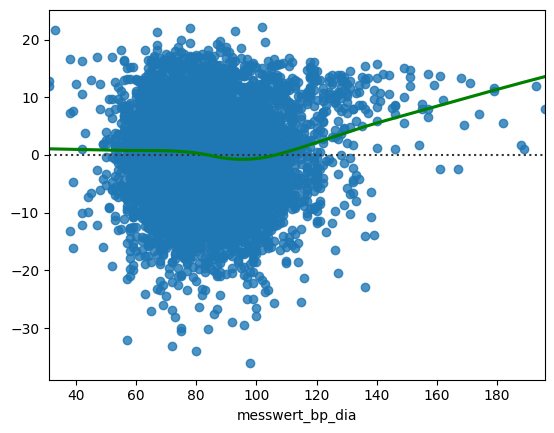

In [12]:
generate_residual_plot(Y_train_dia, model_base_dia)

Best Subset

In [13]:
model_type = "LinearRegression"
features = list(X_train_dia.columns)
model_best_dia, test_results_best_dia, train_results_best_dia = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_dia, Y_train_dia, X_test_dia, Y_test_dia,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'messwert_bp_sys', 'month', 'hour', 'day', 'age']
Train Results:  {'r_2': 0.4589096591380577, 'adjusted_r_2': 0.4583878748170722, 'mse': 110.07354381755509}
Test Results:  {'r_2': 0.4477804705176478, 'adjusted_r_2': 0.44653645265443, 'mse': 107.89323600092835}


In [14]:
model_best_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     879.5
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        15:59:58   Log-Likelihood:                -39131.
No. Observations:               10381   AIC:                         7.828e+04
Df Residuals:                   10370   BIC:                         7.836e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   28.1605      1.073     26.247      0.000      26.057      30.264
geschlecht_m                 0.9886      0.211      4.693      0.000       0.576       1.402
raucher_True                 0.3633      0.286      1.269      0.204      -0.198       0.924
blutzucker_bekannt_True     -0.4248      0.291     -1.458      0.145      -0.996       0.146
cholesterin_bekannt_True     0.3086      0.271      1.140      0.255      -0.222       0.840
in_behandlung_True          -1.6680      0.332     -5.017      0.000      -2.320      -1.016
messwert_bp_sys              0.5185      0.006     89.933      0.000       0.507       0.530
month                       -0.7345      0.060    -12.142      0.000      -0.853      -0.616
hour                        -0.0492      0.046     -1.068      0.285      -0.140       0.041
day                         -0.0511      0.012     -4.423      0.000      -0.074      -0.028
age                         -0.0810      0.007    -11.170      0.000      -0.095      -0.067
==============================================================================
Omnibus:                     1355.903   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4308.988
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                       5.853   Cond. No.                     1.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
print(model_best_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                    & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                  &      28.1605  &        1.073     &    26.247  &         0.000        &       26.057    &       30.264     \\
\textbf{geschlecht\_m}              &       0.9886  &        0.211     &     4.693  &         0.000        &        0.576    &        1.402     \\
\textbf{raucher\_True}              &       0.3633  &        0.286     &     1.269  &         0.204        &       -0.198    &        0.924     \\
\textbf{blutzucker\_bekannt\_True}  &      -0.4248  &        0.291     &    -1.458  &         0.145        &       -0.996    &        0.146     \\
\textbf{cholesterin\_bekannt\_True} &       0.3086  &        0.271     &     1.140  &         0.255        &       -0.222    &        0.840     \\
\textbf{in\_behandlung\_True}       &      -1.6680  &        

In [16]:
train_result_list = [train_results_base_dia, train_results_best_dia]

test_result_list = [test_results_base_dia, test_results_best_dia]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),109.704,108.246,0.461,0.446,0.460,0.443
1,LM (Best Subset),107.893,110.074,0.448,0.459,0.447,0.458


In [17]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 109.703824 & 108.246008 & 0.460727 & 0.445975 & 0.459530 & 0.443096 \\
1 & LM (Best Subset) & 107.893236 & 110.073544 & 0.447780 & 0.458910 & 0.446536 & 0.458388 \\
\bottomrule
\end{tabular}



### Models for Systolic as target

In [18]:
target_sys = "messwert_bp_sys"
X_train_sys, Y_train_sys = separate_target(encoded_train_set, target_sys)
X_test_sys, Y_test_sys = separate_target(encoded_test_set, target_sys)

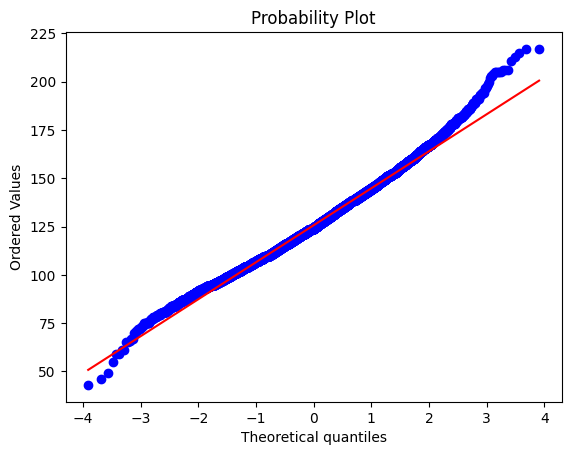

In [19]:
generate_qq_plot(data_df[target_sys])

Base Model

In [20]:
train_results_base_sys, test_results_base_sys, model_base_sys = fit_model(X_train_sys, Y_train_sys, X_test_sys,
                                                                        Y_test_sys, "LinearRegression")
model_base_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     487.9
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        15:59:58   Log-Likelihood:                -41646.
No. Observations:               10381   AIC:                         8.334e+04
Df Residuals:                   10357   BIC:                         8.351e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      36.1740      2.060     17.558      0.000      32.136      40.212
bundesland_Kärnten             -1.7309      1.953     -0.886      0.375      -5.559       2.097
bundesland_Niederösterreich    -0.0194      1.729     -0.011      0.991      -3.408       3.369
bundesland_Oberösterreich      -1.5919      1.912     -0.833      0.405      -5.339       2.155
bundesland_Salzburg            -3.5564      2.306     -1.542      0.123      -8.077       0.964
bundesland_Steiermark          -0.2244      1.533     -0.146      0.884      -3.229       2.780
bundesland_Tirol               -5.3293      2.464     -2.163      0.031     -10.158      -0.500
bundesland_Vorarlberg          -5.0727      3.589     -1.413      0.158     -12.109       1.963
bundesland_Wien                -1.8231      1.693     -1.077      0.282      -5.142       1.496
bundesland_not_applicable      -1.5220      1.821     -0.836      0.403      -5.092       2.048
befinden_2                      1.2907      0.296      4.366      0.000       0.711       1.870
befinden_3                      1.1716      0.423      2.773      0.006       0.343       2.000
befinden_4                      0.4686      1.215      0.386      0.700      -1.914       2.851
befinden_5                     -0.8377      2.085     -0.402      0.688      -4.924       3.248
geschlecht_m                    1.9501      0.269      7.259      0.000       1.423       2.477
raucher_True                   -0.3206      0.366     -0.876      0.381      -1.038       0.397
blutzucker_bekannt_True         1.0676      0.372      2.869      0.004       0.338       1.797
cholesterin_bekannt_True       -0.4909      0.346     -1.420      0.156      -1.169       0.187
in_behandlung_True              5.9761      0.422     14.149      0.000       5.148       6.804
messwert_bp_dia                 0.8457      0.009     90.031      0.000       0.827       0.864
month                           0.8179      0.077     10.571      0.000       0.666       0.970
hour                           -0.0657      0.059     -1.116      0.264      -0.181       0.050
day                             0.0917      0.015      6.212      0.000       0.063       0.121
age                             0.2332      0.009     25.602      0.000       0.215       0.251
==============================================================================
Omnibus:                      111.955   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.867
Skew:                           0.183   Prob(JB):                     1.90e-30
Kurtosis:                       3.427   Cond. No.                     3.82e+03
==============================================================================

Notes:
[1] Stand

In [21]:
print(model_base_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      36.1740  &        2.060     &    17.558  &         0.000        &       32.136    &       40.212     \\
\textbf{bundesland\_Kärnten}          &      -1.7309  &        1.953     &    -0.886  &         0.375        &       -5.559    &        2.097     \\
\textbf{bundesland\_Niederösterreich} &      -0.0194  &        1.729     &    -0.011  &         0.991        &       -3.408    &        3.369     \\
\textbf{bundesland\_Oberösterreich}   &      -1.5919  &        1.912     &    -0.833  &         0.405        &       -5.339    &        2.155     \\
\textbf{bundesland\_Salzburg}         &      -3.5564  &        2.306     &    -1.542  &         0.123        &       -8.077    &        0.964     \\
\textbf{bundesland\_Steiermark}       &      -0.2

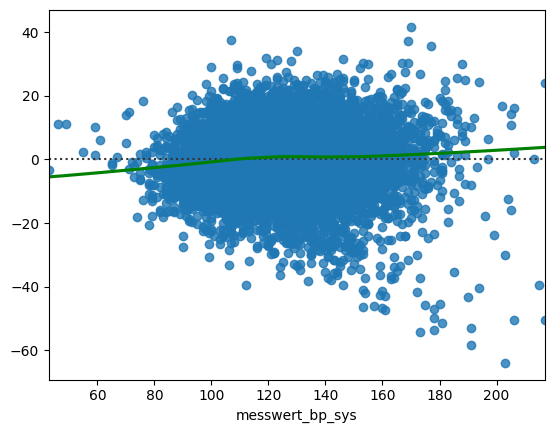

In [22]:
generate_residual_plot(Y_train_sys, model_base_sys)

Base Best Subset

In [23]:
model_type = "LinearRegression"
features = list(X_train_sys.columns)
model_best_sys, test_results_best_sys, train_results_best_sys = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_sys, Y_train_sys, X_test_sys, Y_test_sys,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'messwert_bp_dia', 'month', 'hour', 'day', 'age']
Train Results:  {'r_2': 0.5180562853028914, 'adjusted_r_2': 0.5175915372655749, 'mse': 179.4356174932564}
Test Results:  {'r_2': 0.5074429074867919, 'adjusted_r_2': 0.5063332947530383, 'mse': 179.6982814142818}


In [24]:
model_best_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        16:00:07   Log-Likelihood:                -41668.
No. Observations:               10381   AIC:                         8.336e+04
Df Residuals:                   10370   BIC:                         8.344e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   36.2863      1.369     26.506      0.000      33.603      38.970
geschlecht_m                 1.9208      0.269      7.151      0.000       1.394       2.447
raucher_True                -0.2070      0.366     -0.566      0.571      -0.923       0.509
blutzucker_bekannt_True      1.0298      0.372      2.768      0.006       0.301       1.759
cholesterin_bekannt_True    -0.4822      0.346     -1.394      0.163      -1.160       0.196
in_behandlung_True           6.1037      0.421     14.507      0.000       5.279       6.928
messwert_bp_dia              0.8452      0.009     89.933      0.000       0.827       0.864
month                        0.8242      0.077     10.654      0.000       0.673       0.976
hour                        -0.0638      0.059     -1.084      0.279      -0.179       0.052
day                          0.0916      0.015      6.210      0.000       0.063       0.121
age                          0.2392      0.009     26.532      0.000       0.222       0.257
==============================================================================
Omnibus:                      109.696   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.575
Skew:                           0.186   Prob(JB):                     2.68e-29
Kurtosis:                       3.406   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
print(model_best_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                    & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                  &      36.2863  &        1.369     &    26.506  &         0.000        &       33.603    &       38.970     \\
\textbf{geschlecht\_m}              &       1.9208  &        0.269     &     7.151  &         0.000        &        1.394    &        2.447     \\
\textbf{raucher\_True}              &      -0.2070  &        0.366     &    -0.566  &         0.571        &       -0.923    &        0.509     \\
\textbf{blutzucker\_bekannt\_True}  &       1.0298  &        0.372     &     2.768  &         0.006        &        0.301    &        1.759     \\
\textbf{cholesterin\_bekannt\_True} &      -0.4822  &        0.346     &    -1.394  &         0.163        &       -1.160    &        0.196     \\
\textbf{in\_behandlung\_True}       &       6.1037  &        

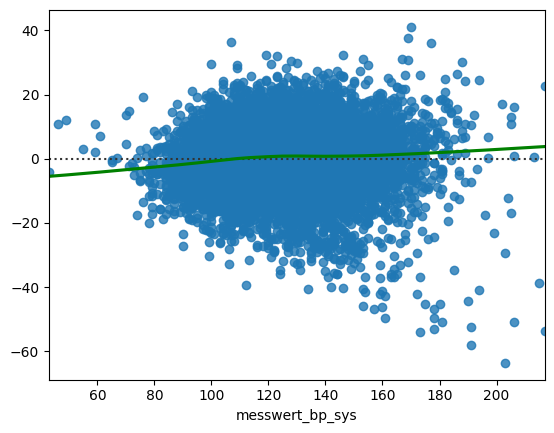

In [26]:
generate_residual_plot(Y_train_sys, model_best_sys)

In [27]:
train_result_list = [train_results_base_sys, train_results_best_sys]

test_result_list = [test_results_base_sys, test_results_best_sys]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),178.696,180.629,0.520,0.505,0.519,0.502
1,LM (Best Subset),179.698,179.436,0.507,0.518,0.506,0.518


In [28]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 178.695916 & 180.628617 & 0.520043 & 0.504893 & 0.518977 & 0.502320 \\
1 & LM (Best Subset) & 179.698281 & 179.435617 & 0.507443 & 0.518056 & 0.506333 & 0.517592 \\
\bottomrule
\end{tabular}

